In [38]:
import sklearn.cross_validation
import sklearn.datasets
import sklearn.metrics
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from hpsklearn import estimator, components
from hyperopt import tpe
import fonctions_auxiliaires as aux

In [39]:
X_train = pd.read_csv('adult_train.csv',delimiter=',',header = None)
X_test = pd.read_csv('adult_test.csv',delimiter=',',header = None)

del X_train[3] #Bijection with '4'
del X_test[3]


In [40]:
temp = list(X_test[14])
for i , el in enumerate(temp) :

    temp[i] = el.replace('.','')
        
X_test[14] = temp

In [41]:
le1 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()
le7 = LabelEncoder()
le8 = LabelEncoder()
le9 = LabelEncoder()
le13 = LabelEncoder()
le14 = LabelEncoder()

LabelEncoders = [le1, le5, le6 , le7 , le8 , le9 , le13 , le14]
categorial_features = [1,5,6,7,8,9,13,14]


for i , j in enumerate(categorial_features) : 
    
    LabelEncoders[i].fit(X_train[j])
    X_train[j] =  LabelEncoders[i].transform(X_train[j])
    X_test[j] =  LabelEncoders[i].transform(X_test[j])
    
    
y_train = X_train[14]
del X_train[14]

y_test = X_test[14]
del X_test[14]

In [42]:
estim = estimator.hyperopt_estimator(classifier=components.any_classifier('clf'),algo=tpe.suggest, trial_timeout=120, \
                                     fit_increment = 1, fit_increment_dump_filename= 'Logfils')

In [43]:
estim.fit(np.ascontiguousarray(X_train), y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 w

In [45]:
y = estim.predict(X_test)

In [48]:
metrics_adult = aux.metrics(estim, X_train, y_train, X_test, y_test, y)

In [49]:
metrics_adult

(0.92355885875740917,
 0.86296910509182478,
 0.942983514274226,
 0.88511473429951693,
 0.91313320095004469)

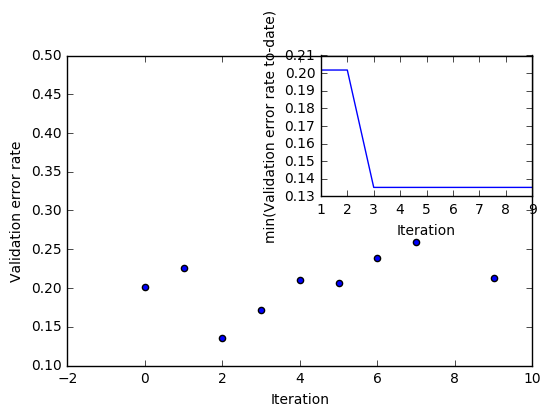

In [50]:
aux.plot_perf(estim)

In [51]:
classifiers = estim.trials.trials[2]['misc']['vals']

In [59]:
list_clf =['svc', 'knn', 'random_forest', 'extra_trees', 'ada_boost', 'gradient_boosting', 'sgd']
new_list = estim.trials.vals['preprocessing'].map(lambda x: list_clf[x])

AttributeError: 'list' object has no attribute 'map'

In [ ]:
estim.trials.trials

In [ ]:
estim = estimator.hyperopt_estimator(classifier= components.knn([2,0, 2, 2]),trial_timeout=60, \
                                     fit_increment = 1, fit_increment_dump_filename= 'Logfils')

In [ ]:
estim.fit(np.ascontiguousarray(X_train), y_train)

In [ ]:
estim.score(X_train,y_train)

In [ ]:
print(estim.score(X_test, y_test))

In [ ]:
y_bis = estim.predict(X_test)

In [ ]:
cm_bis = confusion_matrix(y_true=y_test, y_pred=y_bis)

In [ ]:
y_bis, cm_bis

In [ ]:
y-y_bis

In [ ]:
len(y)

In [ ]:
number_diff =0
for i in range(0,len(y)):
    if y[i] != y_bis[i]:
        number_diff = number_diff +1
print(number_diff)